In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [26]:
task = mnist.MNIST()
task.load_all_data()

In [27]:
class Net(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 10, kernel_size=3)
        self.conv3 = nn.Conv2d(10, 10, kernel_size=3)
        self.fc1 = nn.Linear(10, 10)
        self.fc2 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.relu(torch.max_pool2d(self.conv1(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv2(x), 2))
        x = torch.relu(torch.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 10)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [28]:
n_dim = util.count_params(Net())

In [29]:
device = 'cpu'
net = models_pheno.BigConvNet()
net = net.to(device)
def fit_mnist(pop):
    pop = pop.to(device)
    fit = task.calc_pop_fitness(pop, geno2pheno=lambda x: util.vec2model(x, net), device=device)
    return torch.from_numpy(fit.sel(metric='loss').data)
optim_fn = fit_mnist

In [33]:
from tqdm.notebook import tqdm

In [36]:
pop = torch.randn(11, n_dim)/10.
pops, fits = optim.run_evolution_base(pop, fit_mnist, 100, mr=1e-1, tqdm=tqdm)

hello
hello


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

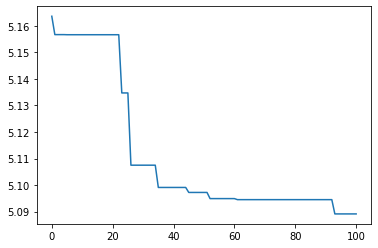

In [19]:
plt.plot(fits.min(dim=-1).values)